In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # ML data
from sklearn.model_selection import train_test_split #to split data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #to evaluate modelaccuracy

print("library loaded Successfully")

library loaded Successfully


In [2]:
data = {
    "Hours": [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0],
    "Scores": [20, 30, 35, 40, 50, 55, 65, 70, 80, 85, 90]
}
df = pd.DataFrame(data)
print("Dataset Preview: ")
print(df.head())

Dataset Preview: 
   Hours  Scores
0    1.5      20
1    2.0      30
2    2.5      35
3    3.0      40
4    3.5      50


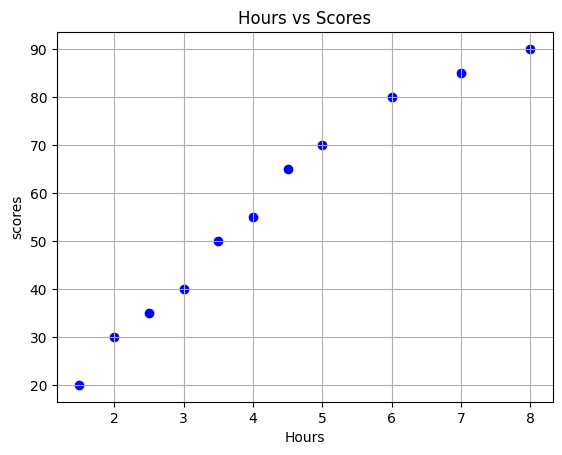

In [3]:
plt.scatter(df["Hours"],df["Scores"] , color = "Blue")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("scores")
plt.grid(True)
plt.show()

In [4]:
X = df[["Hours"]] # double brackets t make it a dataframe(2D)
y= df["Scores"]
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Data split into train and test sets!")
print("Training Samples : " , len(X_Train))
print("Testing Samples : " , len(X_Test))


Data split into train and test sets!
Training Samples :  8
Testing Samples :  3


In [5]:
model = LinearRegression()
model.fit(X_Train,y_Train)
print("Model has been trained successfully!")

Model has been trained successfully!


In [6]:
print(f"slope(m): {model.coef_}")
print(f"intercept(b):  {model.intercept_}")

slope(m): [10.77094972]
intercept(b):  11.05027932960894


In [7]:
y_pred = model.predict(X_Test)

results = pd.DataFrame({
"Actual": y_Test.values,
"predicted":y_pred
})
print("Actual Vs Predicted : ")

print(results)

Actual Vs Predicted : 
   Actual  predicted
0      55  54.134078
1      20  27.206704
2      85  86.446927


In [8]:
mae = mean_absolute_error(y_Test,y_pred)
r2 = r2_score(y_Test,y_pred)
mse = mean_squared_error(y_Test,y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 3.1731843575419014
R-squared (R2): 0.9741196847444723
Mean Squared Error (MSE): 18.260000208066767


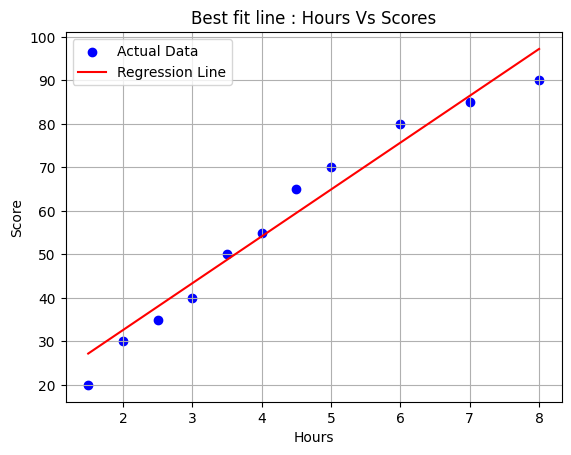

In [9]:
#step 8: plotting the regression line over the data points

plt.scatter(X,y,color ='blue',label='Actual Data')
plt.plot(X,model.predict(X),color ='r' , label = 'Regression Line')
plt.title("Best fit line : Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
hours = 6.5
predicted_score = model.predict([[hours]])
print(f"If a student studies {hours} hours, predicted score is {predicted_score[0]:.2f}")


If a student studies 6.5 hours, predicted score is 81.06


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
